<a href="https://colab.research.google.com/github/ArmanSahota/Assignment_Unit_Testing/blob/master/FoodVisionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## get the data

In [4]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-04 07:53:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.207, 74.125.69.207, 64.233.182.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   241MB/s    in 0.4s    

2023-12-04 07:53:58 (241 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## inspect the data

In [5]:
!ls pizza_steak/

test  train


In [6]:
!ls pizza_steak/test/

pizza  steak


In [7]:
!ls pizza_steak/test/pizza/

1001116.jpg  1459760.jpg  2082495.jpg  254812.jpg   328965.jpg	 3785667.jpg  625434.jpg
1032754.jpg  1475479.jpg  2101820.jpg  2549661.jpg  3296507.jpg  3793004.jpg  645087.jpg
103708.jpg   1484836.jpg  2111981.jpg  2572488.jpg  3296907.jpg  380739.jpg   648055.jpg
1060407.jpg  148765.jpg   2124579.jpg  2582289.jpg  3316410.jpg  3814200.jpg  65128.jpg
106507.jpg   1503858.jpg  212995.jpg   2583389.jpg  331644.jpg	 3827990.jpg  666569.jpg
1067986.jpg  1506213.jpg  2157510.jpg  2605853.jpg  335474.jpg	 3898047.jpg  678708.jpg
1106738.jpg  1507019.jpg  2161321.jpg  2615100.jpg  3375083.jpg  3913440.jpg  714866.jpg
1119571.jpg  1512557.jpg  2165223.jpg  2619955.jpg  3376617.jpg  3919151.jpg  723745.jpg
11297.jpg    153195.jpg   2195935.jpg  2631321.jpg  3385460.jpg  395662.jpg   724290.jpg
1152100.jpg  1555015.jpg  2203687.jpg  2719697.jpg  3392194.jpg  397910.jpg   728260.jpg
1179703.jpg  1594097.jpg  2218680.jpg  2782998.jpg  341377.jpg	 398345.jpg   729262.jpg
1180001.jpg  1618659.jpg  

In [8]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [9]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

# to visualize our images, first lets get the class names programmatically.

In [10]:
#get class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class names in the sub directories
print(class_names)

['pizza' 'steak']


In [11]:
#lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):

  # setup the target directory
  target_folder = target_dir+target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder +  "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"image shape:{img.shape} ")

  return img

image shape:(512, 512, 3) 


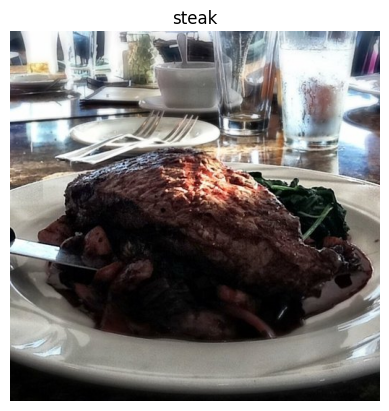

In [12]:
#view the random image

img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[65, 75, 85],
        [63, 73, 83],
        [61, 71, 81],
        ...,
        [47, 65, 87],
        [46, 64, 86],
        [54, 72, 94]],

       [[65, 75, 85],
        [63, 73, 83],
        [61, 71, 81],
        ...,
        [48, 66, 88],
        [49, 67, 89],
        [52, 70, 92]],

       [[65, 75, 87],
        [64, 74, 86],
        [61, 71, 81],
        ...,
        [52, 70, 92],
        [53, 71, 93],
        [51, 69, 91]],

       ...,

       [[ 5,  5,  3],
        [ 3,  3,  1],
        [ 1,  1,  0],
        ...,
        [13, 14,  9],
        [14, 15, 10],
        [13, 14,  9]],

       [[ 6,  6,  4],
        [ 3,  3,  1],
        [ 1,  1,  0],
        ...,
        [12, 13,  8],
        [12, 13,  8],
        [ 9, 10,  5]],

       [[ 4,  4,  2],
        [ 2,  2,  0],
        [ 0,  0,  0],
        ...,
        [11, 12,  7],
        [11, 12,  7],
        [ 7,  8,  3]]], dtype=uint8)>

In [14]:
img.shape

(512, 512, 3)

#Normalize the image

In [15]:
img/255. #you divide by 225 to get the values between zero and 1 and you add the period at the end to turn it into a float


array([[[0.25490196, 0.29411765, 0.33333333],
        [0.24705882, 0.28627451, 0.3254902 ],
        [0.23921569, 0.27843137, 0.31764706],
        ...,
        [0.18431373, 0.25490196, 0.34117647],
        [0.18039216, 0.25098039, 0.3372549 ],
        [0.21176471, 0.28235294, 0.36862745]],

       [[0.25490196, 0.29411765, 0.33333333],
        [0.24705882, 0.28627451, 0.3254902 ],
        [0.23921569, 0.27843137, 0.31764706],
        ...,
        [0.18823529, 0.25882353, 0.34509804],
        [0.19215686, 0.2627451 , 0.34901961],
        [0.20392157, 0.2745098 , 0.36078431]],

       [[0.25490196, 0.29411765, 0.34117647],
        [0.25098039, 0.29019608, 0.3372549 ],
        [0.23921569, 0.27843137, 0.31764706],
        ...,
        [0.20392157, 0.2745098 , 0.36078431],
        [0.20784314, 0.27843137, 0.36470588],
        [0.2       , 0.27058824, 0.35686275]],

       ...,

       [[0.01960784, 0.01960784, 0.01176471],
        [0.01176471, 0.01176471, 0.00392157],
        [0.00392157, 0

### an end to end example


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the random seed
tf.random.set_seed(42)

#preprocess data(get all of the pixel values between 0 and 1 )
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"
#import data directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
#build a cnn model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile our CNN

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1= model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 165ms/step - loss: 0.6025 - accuracy: 0.6573 - val_loss: 0.4308 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 6s 138ms/step - loss: 0.4545 - accuracy: 0.7900 - val_loss: 0.4011 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 7s 147ms/step - loss: 0.4300 - accuracy: 0.8087 - val_loss: 0.3607 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3667 - accuracy: 0.8387 - val_loss: 0.3587 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 7s 147ms/step - loss: 0.3082 - accuracy: 0.8720 - val_loss: 0.3407 - val_accuracy: 0.8640


In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### Using our old model for notebook 02

In [18]:
#set random seed
tf.random.set_seed(42)

#create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 138ms/step - loss: 1.0205 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000


In [19]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model 2 performs very bad compaired to model 1 even though model 2 has 20x more parameters

In [20]:
#set random seed
tf.random.set_seed(42)

#create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 109ms/step - loss: 3.5091 - accuracy: 0.6000 - val_loss: 1.4138 - val_accuracy: 0.6880
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6713 - accuracy: 0.7320 - val_loss: 0.7589 - val_accuracy: 0.7000
Epoch 3/5
47/47 [==============================] - 7s 155ms/step - loss: 0.6837 - accuracy: 0.7233 - val_loss: 0.4452 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.5445 - accuracy: 0.7607 - val_loss: 0.4167 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 6s 123ms/step - loss: 0.5087 - accuracy: 0.7807 - val_loss: 0.5252 - val_accuracy: 0.7920


In [21]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Binary classification: Let's break it down
We just went through a bunch of steps:

Become one with the data (visualize, visualize, visualize...)

Preprocess the data (prepare it for a model)

Create a model (start with a baseline)

Fit the model

Evaluate the model

Adjust different parameters and improve model (try to beat your baseline)

Repeat until satisfied

Let's step through each.

### become one with the data

image shape:(384, 512, 3) 
image shape:(512, 512, 3) 


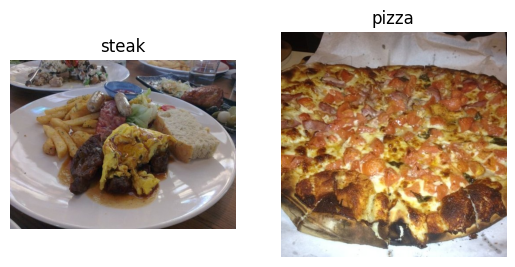

In [22]:
#visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


### preparing to load our data( preprocess )

In [23]:
#define directory data set paths
train_dir= "pizza_steak/train/"
test_dir= "pizza_steak/test/"

 Batches just makes our big data like 10000 images into small bite size data sets so it is easier to read for our data and memory. if we gave our system all 10000 images we would run out of memory


In [24]:
#create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255.)

In [25]:
#load in our image data from our directories  and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                target_size=(224,224),
                                                class_mode="binary",
                                                batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                                target_size=(224,224),
                                                class_mode="binary",
                                                batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
#get a sample of the training label batch
images, labels = train_data.next() #get the "next" batch of images/ labels the train data
len(images), len(labels)

(32, 32)

In [27]:
#how many batches are there
len(train_data)

47

In [28]:
#get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [29]:
images[31]

array([[[0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        ...,
        [0.01960784, 0.00392157, 0.        ],
        [0.01960784, 0.00392157, 0.        ],
        [0.01960784, 0.00392157, 0.        ]],

       [[0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.03529412, 0.00392157, 0.        ],
        [0.03137255, 0.        , 0.        ],
        [0.03137255, 0.        , 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ],
        ...,
        [0.05882353, 0.00392157, 0.00392157],
        [0.05490196, 0.        , 0.        ],
        [0.04705883, 0.        , 0.        ]],

       ...,

       [[0.8941177 , 0.7960785 , 0.7176471 ],
        [0.8980393 , 0.8000001 , 0.72156864],
        [0.8980393 , 0

In [30]:
#view the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### create a model (START WITH A BASELINE)

In [31]:
# Make the creating of our model a easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [32]:
#create the model which will the baseline that we will compare our later models to
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [33]:
# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [34]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. fit the model


In [35]:
#check the lengths of the training and test data generators
len(train_data), len(test_data)

(47, 16)

In [36]:
#fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=(len(train_data)),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 152ms/step - loss: 1.4398 - accuracy: 0.6433 - val_loss: 0.5747 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 6s 121ms/step - loss: 0.5331 - accuracy: 0.7400 - val_loss: 0.4609 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 6s 127ms/step - loss: 0.4279 - accuracy: 0.8087 - val_loss: 0.3735 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3279 - accuracy: 0.8747 - val_loss: 0.3670 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 7s 145ms/step - loss: 0.2430 - accuracy: 0.9020 - val_loss: 0.3345 - val_accuracy: 0.8380


### 5. evaluate our model

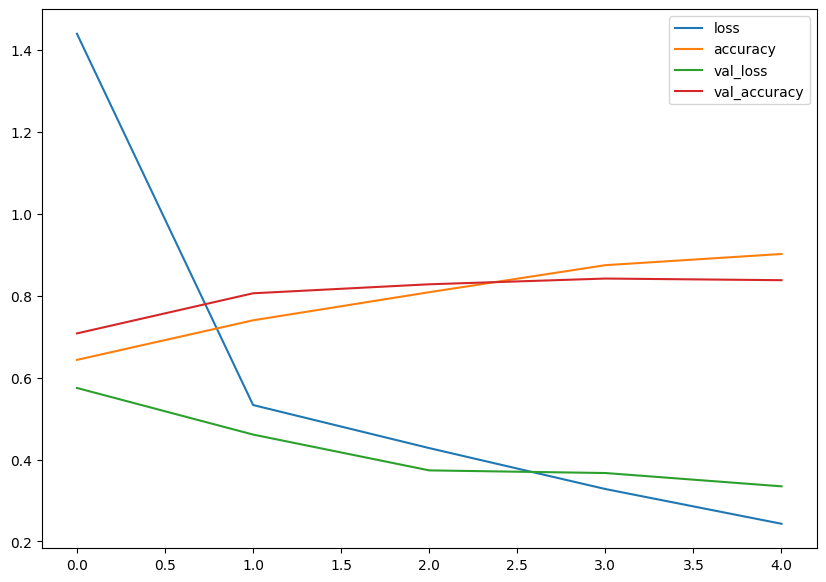

In [37]:
#plot the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [38]:
#plot the validation and training curves separately
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))
  #plot loss
  plt.figure()
  plt.plot(epochs, loss, label ="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label ="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

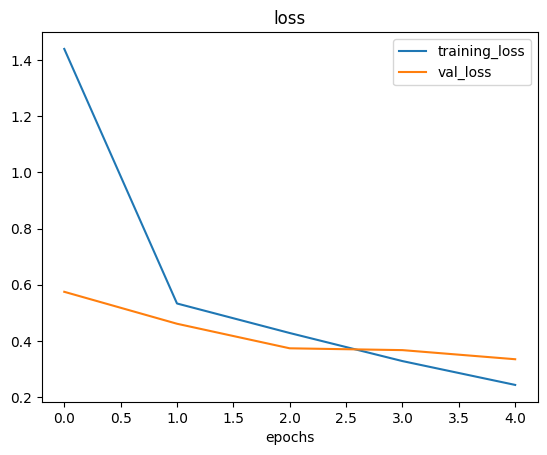

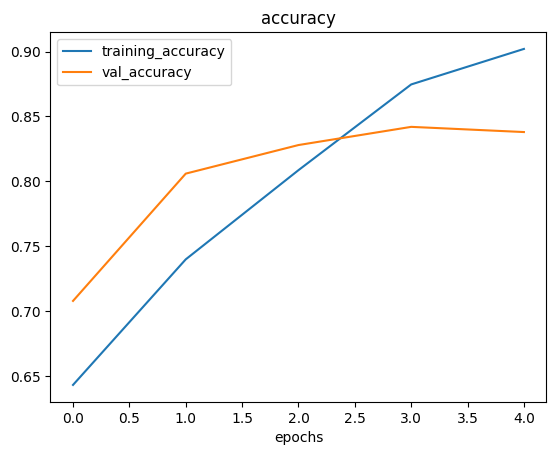

In [39]:
#check the loss and accuracy of model 4
plot_loss_curves(history_4) # after looking it looks like we are over fitting our data

### 6. adjust models parameters

In [40]:
#create a model
model_5 = Sequential([
    Conv2D(10,3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [41]:
#compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [42]:
#fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=(len(train_data)),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 116ms/step - loss: 0.6418 - accuracy: 0.6367 - val_loss: 0.5537 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 7s 141ms/step - loss: 0.4749 - accuracy: 0.7740 - val_loss: 0.4612 - val_accuracy: 0.7500
Epoch 3/5
47/47 [==============================] - 7s 140ms/step - loss: 0.4480 - accuracy: 0.8007 - val_loss: 0.3741 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4267 - accuracy: 0.8267 - val_loss: 0.3699 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 6s 138ms/step - loss: 0.3757 - accuracy: 0.8340 - val_loss: 0.3252 - val_accuracy: 0.8480


In [43]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, None, None, 10)    0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, None, None, 10)    0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, None, None, 10)   

In [44]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


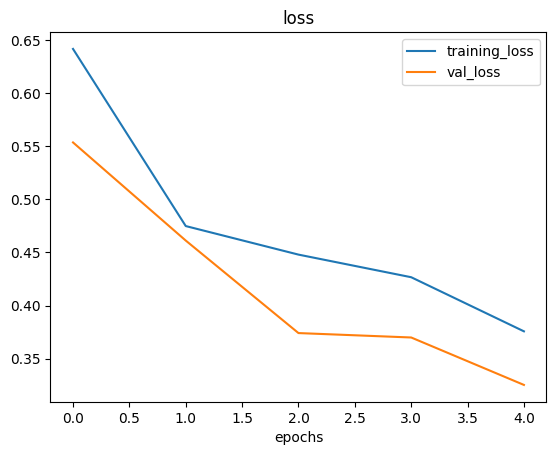

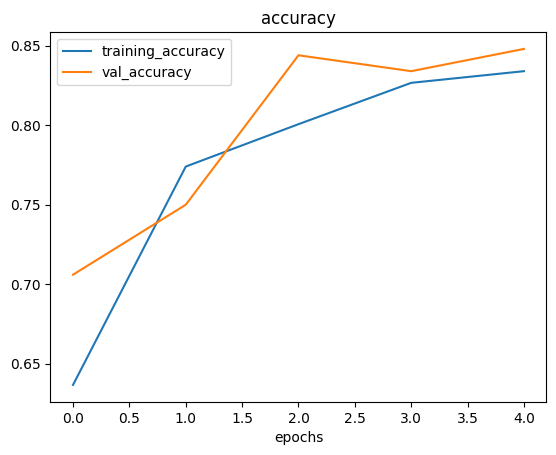

In [45]:
plot_loss_curves(history_5)

### Data augmentation

In [46]:
#create ImageDataGeneraton training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
#create imagedatagenerator with out data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)


Data augmentation alters the training data which could lead to our machine learning to find more patterns. We augment by flipping it, changing the shape, the zoom, ect.  

In [47]:
tf.version
tf.__version__

'2.14.0'

In [48]:
# Turn it into batches


# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


# visulaize augmented data

In [49]:
#get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


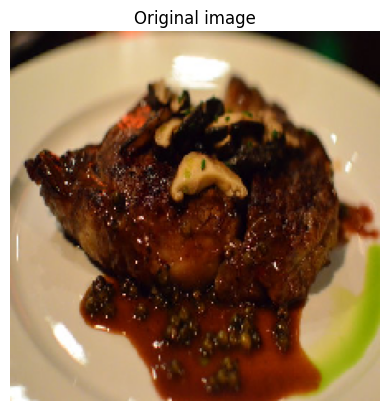

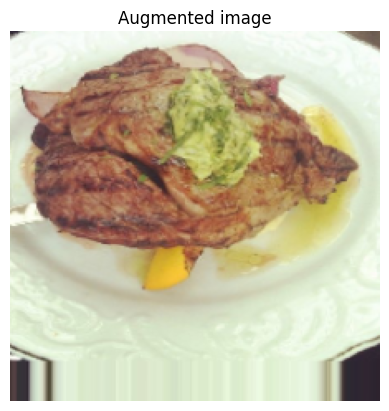

In [50]:
import random
import matplotlib.pyplot as plt

# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


In [51]:
#now we have seen what augmented training data is lets buiold a model with it
model_6 = Sequential([
    Conv2D(10,3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation=("sigmoid"))
])

#compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 482ms/step - loss: 0.6650 - accuracy: 0.5973 - val_loss: 0.5182 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 23s 488ms/step - loss: 0.5455 - accuracy: 0.7373 - val_loss: 0.4030 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 22s 474ms/step - loss: 0.5070 - accuracy: 0.7553 - val_loss: 0.4008 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 22s 457ms/step - loss: 0.4859 - accuracy: 0.7620 - val_loss: 0.3373 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 21s 452ms/step - loss: 0.4626 - accuracy: 0.7847 - val_loss: 0.3249 - val_accuracy: 0.8620


In [52]:
#shuffeled training data
model_7 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation=("sigmoid"))
])

#compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fit the model
history_7 = model_7.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 485ms/step - loss: 0.6522 - accuracy: 0.6007 - val_loss: 0.6222 - val_accuracy: 0.6040
Epoch 2/5
47/47 [==============================] - 22s 479ms/step - loss: 0.5528 - accuracy: 0.7113 - val_loss: 0.4051 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 21s 446ms/step - loss: 0.5132 - accuracy: 0.7460 - val_loss: 0.3497 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 23s 487ms/step - loss: 0.4881 - accuracy: 0.7740 - val_loss: 0.3316 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 21s 449ms/step - loss: 0.4642 - accuracy: 0.7807 - val_loss: 0.3531 - val_accuracy: 0.8380


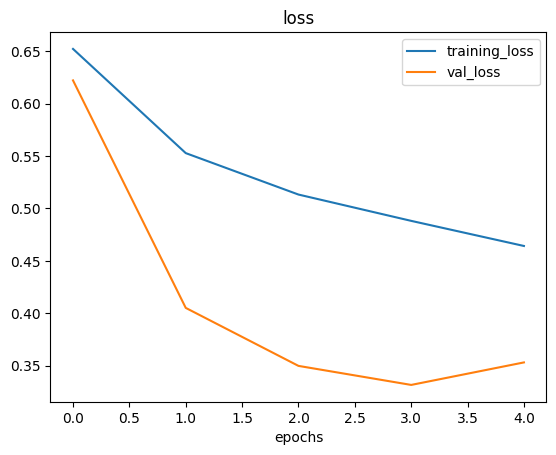

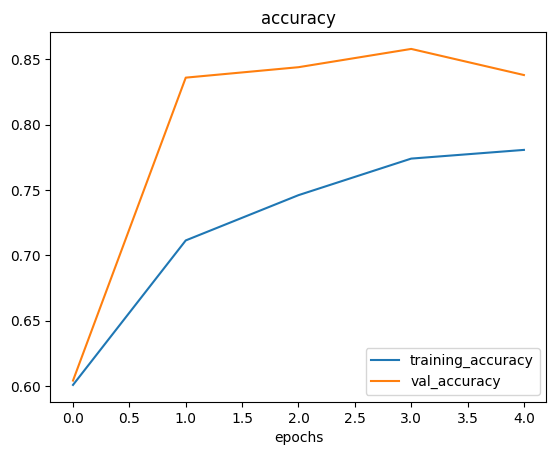

In [53]:
#plot loss curves
plot_loss_curves(history_7)

###7 repeat until satisfied

* add more layers,
* add more filters,
* train for longer,
* find an ideal learning rate,
* get more data,
* use transfer learning to leverage what other model has learned and adjust four our own case



### making a prediction with our trained model on our own custom data

In [54]:
#classes we are working iwth
print(class_names)

['pizza' 'steak']


In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

--2023-12-04 08:02:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2023-12-04 08:02:02 (27.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



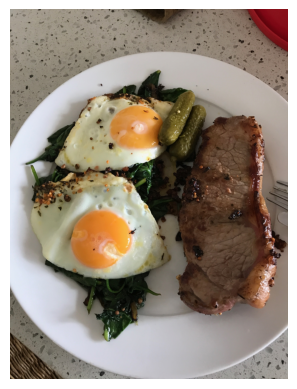

In [56]:
plt.imshow(steak)
plt.axis(False);

In [57]:
#check the shape of our image
steak.shape

(4032, 3024, 3)

#pre process the shape

In [58]:
import tensorflow as tf
import numpy as np

def load_and_prep_image(filename, img_shape=224):
  #read in the image
  img = tf.io.read_file(filename)
  #decode the read file into a tensor
  img = tf.image.decode_image(img)
  #resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  #rescale the imgae to get all values between 0 and 1
  img = img/255.
  return img

In [59]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [60]:
pred = model_7.predict(tf.expand_dims(steak, axis =0))
pred

1/1 [==============================] - 0s 225ms/step


array([[0.75678974]], dtype=float32)

In [61]:
class_names


array(['pizza', 'steak'], dtype='<U5')

In [62]:
#we can index the predicted class by rounding the predcition probablity
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [63]:
def pred_and_plot(model, filename, class_name=class_names):
  #import the target image and preprocess it
  img = load_and_prep_image(filename)
  #make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  #get the predicted class
  pred_class = class_names[int(tf.round(pred))]
  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction:{pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 26ms/step


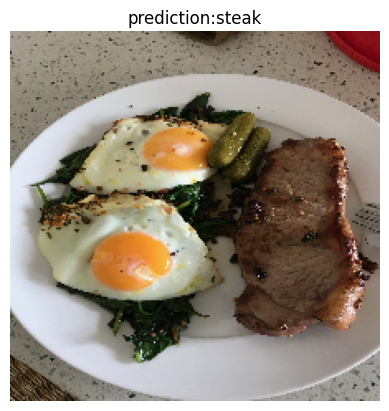

In [64]:
#test our model
pred_and_plot(model_7, "03-steak.jpeg")

In [65]:
# download a new image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-12-04 08:02:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-12-04 08:02:07 (36.7 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



1/1 [==============================] - 0s 21ms/step


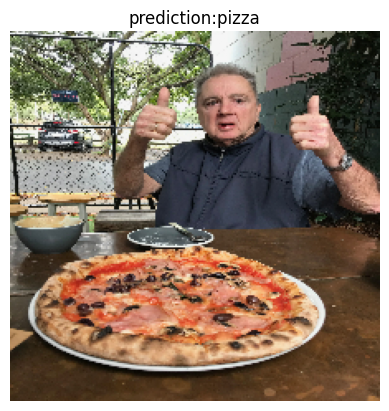

In [66]:
pred_and_plot(model_7, "03-pizza-dad.jpeg")

#multi class image classification

In [67]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-12-04 08:02:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.206.207, 142.251.172.207, 108.177.112.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.206.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  30.2MB/s    in 5.9s    

2023-12-04 08:02:13 (83.9 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [68]:
import os

# walk through 10 classes of image data
for dirpath, dirnames, filenames, in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in{dirpath}.")

there are 2 directories and 0 images in10_food_classes_all_data.
there are 10 directories and 0 images in10_food_classes_all_data/test.
there are 0 directories and 250 images in10_food_classes_all_data/test/ice_cream.
there are 0 directories and 250 images in10_food_classes_all_data/test/chicken_curry.
there are 0 directories and 250 images in10_food_classes_all_data/test/grilled_salmon.
there are 0 directories and 250 images in10_food_classes_all_data/test/ramen.
there are 0 directories and 250 images in10_food_classes_all_data/test/pizza.
there are 0 directories and 250 images in10_food_classes_all_data/test/hamburger.
there are 0 directories and 250 images in10_food_classes_all_data/test/fried_rice.
there are 0 directories and 250 images in10_food_classes_all_data/test/chicken_wings.
there are 0 directories and 250 images in10_food_classes_all_data/test/sushi.
there are 0 directories and 250 images in10_food_classes_all_data/test/steak.
there are 10 directories and 0 images in10_foo

In [69]:
# setup the train and test directories
train_dir ="10_food_classes_all_data/train/"
test_dir ="10_food_classes_all_data/test/"

In [70]:
#lets get class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


image shape:(512, 512, 3) 


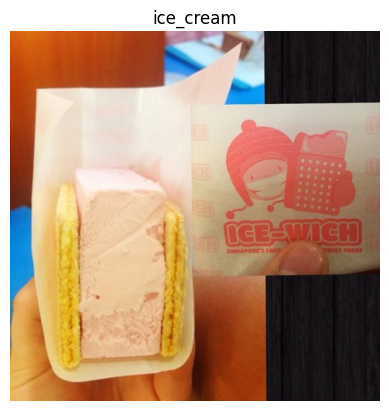

In [71]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

# 2. preprocess the data

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=(1/255.))

#load data in from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224,224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# create a baseline model

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

#create our model
model_8 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, input_shape=(224,224,3)),
    Activation(activation="relu") ,
    Conv2D(10,3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") ])


#compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model

In [74]:
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 32s 129ms/step - loss: 2.0957 - accuracy: 0.2363 - val_loss: 1.9881 - val_accuracy: 0.2984
Epoch 2/5
235/235 [==============================] - 30s 127ms/step - loss: 1.8466 - accuracy: 0.3637 - val_loss: 1.8969 - val_accuracy: 0.3296
Epoch 3/5
235/235 [==============================] - 29s 124ms/step - loss: 1.5508 - accuracy: 0.4799 - val_loss: 1.9267 - val_accuracy: 0.3320
Epoch 4/5
235/235 [==============================] - 30s 127ms/step - loss: 1.0437 - accuracy: 0.6555 - val_loss: 2.3229 - val_accuracy: 0.3036
Epoch 5/5
235/235 [==============================] - 30s 128ms/step - loss: 0.4830 - accuracy: 0.8481 - val_loss: 2.9431 - val_accuracy: 0.2784
